# Computer Vision

## Media Pipe 

You need to have installed:
* cv2, numpy, matlplotlib...
* pytorch (I had a problem so I installed numpy==1.23.1)
* mediapipe: 
    * pip install -q mediapipe==0.10.0
    * wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task
    * see https://developers.google.com/mediapipe/solutions/vision/hand_landmarker
* MANO:
    * models: https://mano.is.tue.mpg.de/download.php (Models&Code ?)
    * from: https://github.com/otaheri/MANO:
        * pip install git+'https://github.com/otaheri/MANO'

In [166]:
import cv2

img = cv2.imread("image.jpg")

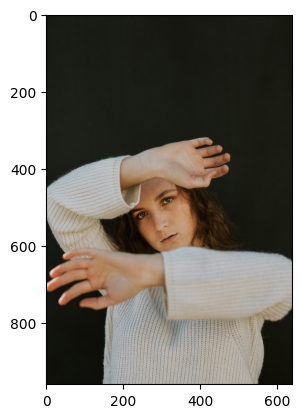

In [167]:
from matplotlib import pyplot as plt
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [168]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

In [169]:
detection_result.hand_landmarks[0]

[NormalizedLandmark(x=0.39291912317276, y=0.7066095471382141, z=-3.293027077688748e-07, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.34312063455581665, y=0.7504479885101318, z=-0.019821790978312492, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.2708950638771057, y=0.7737331986427307, z=-0.027366425842046738, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.20807738602161407, y=0.779670238494873, z=-0.03694787248969078, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.15704940259456635, y=0.7829774022102356, z=-0.04580849036574364, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.2020859718322754, y=0.7279683947563171, z=0.004851780831813812, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.13295286893844604, y=0.743130087852478, z=-0.01850949414074421, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.09457877278327942, y=0.7587484121322632, z=-0.04270356521010399, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.06427456438541412, 

In [170]:
for landmark in detection_result.hand_landmarks[0]:
    h, w, _ = img_rgb.shape
    cx, cy = int(landmark.x * w), int(landmark.y * h)
    cv2.circle(img_rgb, (cx, cy), 5, (0, 255, 0), -1)

In [171]:
for landmark in detection_result.hand_landmarks[1]:
    h, w, _ = img_rgb.shape
    cx, cy = int(landmark.x * w), int(landmark.y * h)
    cv2.circle(img_rgb, (cx, cy), 5, (0, 0, 255), -1)

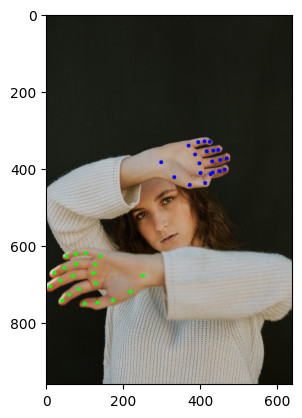

In [172]:
plt.imshow(img_rgb)

## Mano

In [128]:
import torch
import mano
from mano.utils import Mesh
model_path = './mano_models'
n_comps = 23
batch_size = 3

rh_model = mano.load(model_path=model_path,
                     is_rhand= True,
                     num_pca_comps=n_comps,
                     batch_size=batch_size,
                     flat_hand_mean=False)

betas = torch.rand(batch_size, 10)*0.3
pose = torch.rand(batch_size, n_comps)*.4
global_orient = torch.rand(batch_size, 3)*0
transl        = torch.rand(batch_size, 3)*0


output = rh_model(betas=betas,
                  global_orient=global_orient,
                  hand_pose=pose,
                  transl=transl,
                  return_verts=True,
                  return_tips = True)


h_meshes = rh_model.hand_meshes(output)
j_meshes = rh_model.joint_meshes(output)

#visualize hand mesh only
h_meshes[0].show()

#visualize joints mesh only
j_meshes[0].show()

#visualize hand and joint meshes
hj_meshes = Mesh.concatenate_meshes([h_meshes[0], j_meshes[0]])
hj_meshes.show() 